In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 31 15:30:43 2020
@author: mperaud
"""

'\nCreated on Sat Oct 31 15:30:43 2020\n@author: mperaud\n'

In [2]:

import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.basemap import Basemap
#from geopy.geocoders import Nominatim
#from matplotlib.patches import Polygon
import numpy as np

Map creation : EUROPE To define center and four corners of the map GPS coordinates, use
https://boundingbox.klokantech.com/
color codes in https://web-color.aliasdmc.fr/couleur-web-lightskyblue-rgb-hsl-hexa.html#couleurs-blanc

In [3]:
m= Basemap(resolution='l',#low resolution
            projection='merc',#mercator
            lat_0=44.86, lon_0=9.17,#map center coordinates
            llcrnrlon =-20.38, llcrnrlat =28.97, urcrnrlon = 41.27, urcrnrlat = 59.11)
            #four corners of the map coordinates

Stations coordinates in a dataframe (later on)

In [4]:
#Latitude de Hamburg Finkenwerder
latxfw =	53.529481
#Longitude de Hamburg Finkenwerder
longxfw =	9.863512

#Latitude de Toulouse
lattls = 43.636541
#longitude de Toulouse
longtls =1.389942

Function that creates arrow from one point to another one

In [5]:

def gclineAtoB(lonA,latA,lonB,latB,couleur):
    gclineAtoB, = m.drawgreatcircle(lonA,latA,lonB,latB,linewidth=5,color=couleur)
    path = gclineAtoB.get_path() # get path from the great circle
    
    head = m(lonB,latB)    # get location of arrow's head (at A) 
    tail = path.vertices[round(-len(path)/6)] # get location of arrow's tail 
    path = gclineAtoB.get_path() # get path from the great circle
    
#draw annotation with arrow in  color 
#blank text is specified, because we need the arrow only 
#adjust facecolor and other arrow properties as needed 
    plt.annotate('', 
    xy=(head[0], head[1]), 
    xycoords='data', 
    xytext=(tail[0], tail[1]), 
    textcoords='data', 
    size=30, 
    arrowprops=dict(headwidth=20, 
    headlength=30,  
    facecolor=couleur, 
    edgecolor="none",  
    connectionstyle="arc3, rad=0.001")) 
    
    
    
    return

Map + arrows + text

Text(0.5, 1.0, 'A330')

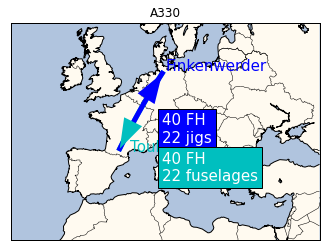

In [7]:
#figure =plt.figure(figsize =(20,20))
m.drawmapboundary(fill_color ='#b0C4DE')#draws the map

m.fillcontinents(color='#fffaf0',lake_color='#b0C4DE')#fill with colors defined above
m.drawcoastlines()
m.drawcountries()
#draws one arrow from A to B and another one from B to A with a different color
AtoB = gclineAtoB(longxfw,latxfw,longtls,lattls,'c')
BtoA = gclineAtoB(longtls,lattls,longxfw,latxfw,'b')

xtls, ytls = m(longtls, lattls)
xxfw,yxfw=m(longxfw,latxfw)
plt.annotate('Toulouse', xy=(xtls, ytls),  xycoords='data',
                xytext=(10,-3), textcoords='offset points',
                color='c',fontsize=15,
                
                )
            
plt.annotate('Finkenwerder', xy=(xxfw, yxfw),  xycoords='data',
                xytext=(+3, +3), textcoords='offset points',
                color='b',fontsize=15
                #arrowprops=dict(arrowstyle="fancy", color='b')
            
                )               


plt.text(xxfw,round(yxfw/1.5), "40 FH\n22 jigs",fontsize=15,
                    ha='left',va='center',color='w',
                    bbox=dict(facecolor='b', alpha=1))

plt.text(xxfw,round(xtls/1.5), "40 FH\n22 fuselages",fontsize=15,
                    ha='left',va='center',color='w',
                    bbox=dict(facecolor='c', alpha=1))

plt.title("A330")


